In [9]:
import numpy as np
from numpy import argmax, array
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import randint as sp_randint
from statsmodels.stats import weightstats as stests
import statsmodels.formula.api as sm
import statsmodels.api as sm
from pandas import plotting
from pprint import pprint
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn import svm, preprocessing, metrics
from sklearn.model_selection import StratifiedKFold, train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, chi2, RFECV, RFE

### 1. Data read

In [10]:
df = pd.read_csv('data-breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [17]:
X.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### 2. Feature selection

In [14]:
X = df.iloc[:, :-1]


In [18]:
X = X.drop(['diagnosis', 'id'], 1)


In [50]:
y = df['diagnosis']


In [46]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

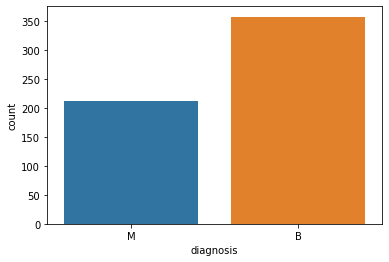

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

In [22]:
import seaborn as sns
sns.countplot(x='diagnosis', data=df)
plt.show()
df['diagnosis'].value_counts(normalize=True) * 100

In [51]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

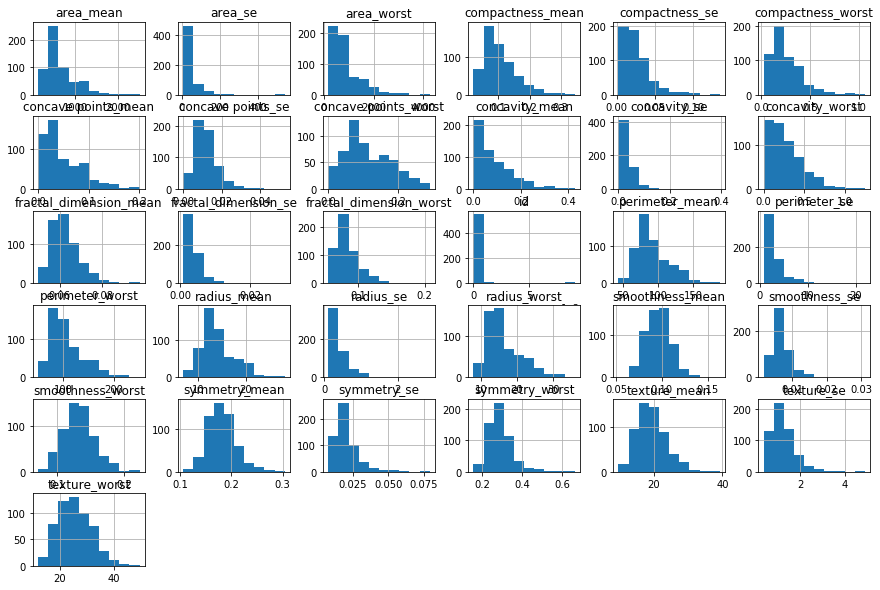

In [23]:
X.hist(figsize = (15,10));

In [15]:
#df.isna().sum()

In [52]:
X.nunique()[:10]

radius_mean               456
texture_mean              479
perimeter_mean            522
area_mean                 539
smoothness_mean           474
compactness_mean          537
concavity_mean            537
concave points_mean       542
symmetry_mean             432
fractal_dimension_mean    499
dtype: int64

In [53]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### checking the correlated features


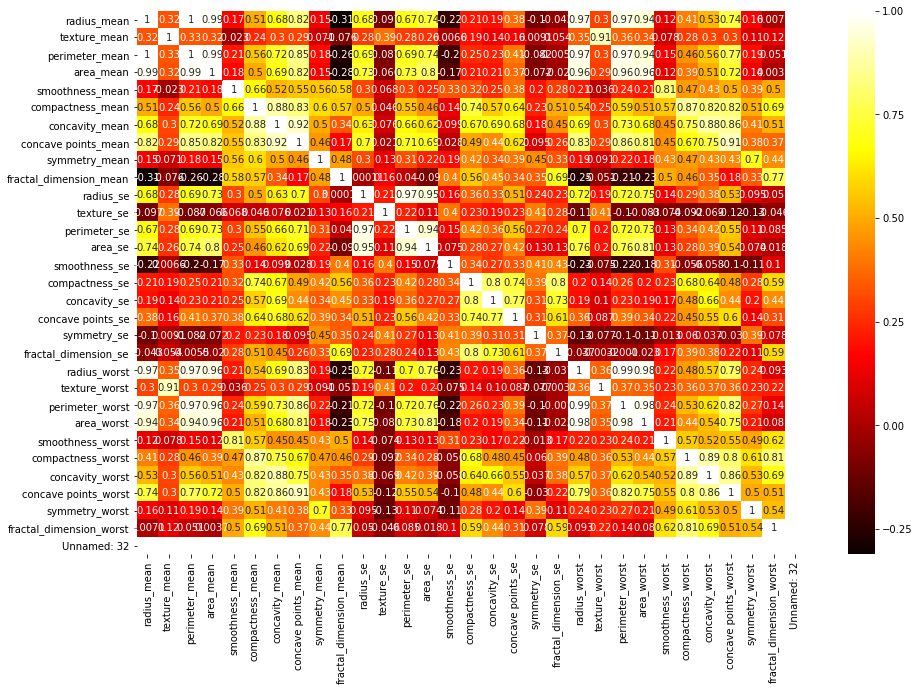

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='hot')
plt.show()

#### drop the correlated features

In [191]:
#X.columns

In [54]:
X = X.drop(['perimeter_mean','radius_se','texture_worst','perimeter_se', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst','compactness_worst', 'concave points_mean','concave points_worst'], axis=1)

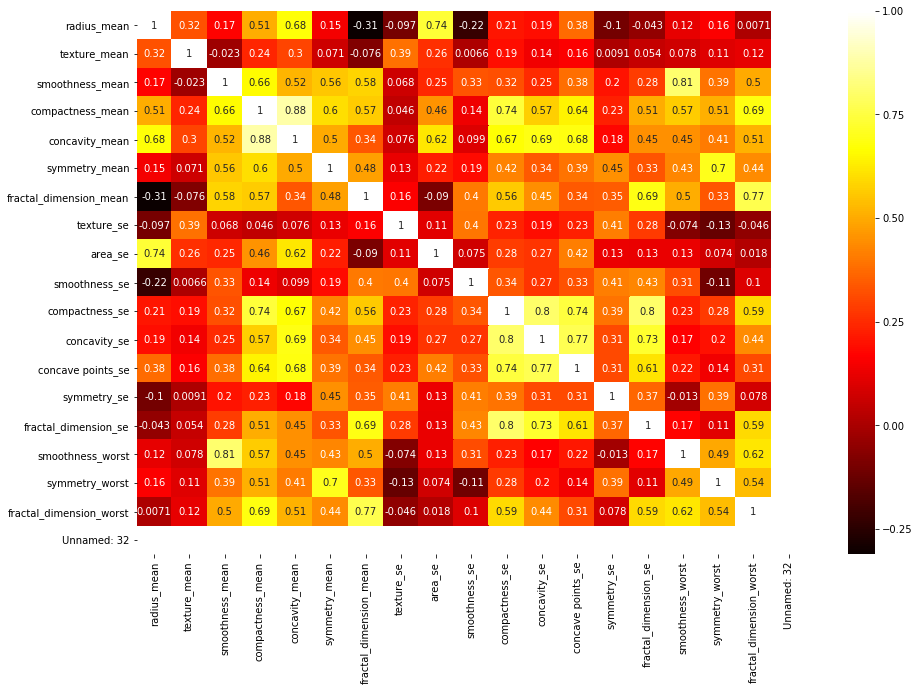

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='hot')
plt.show()

### Split the data, model selection

In [55]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
#Train with Decision Tree Classifier

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
score_dt = np.mean(
    cross_val_score(dtc,
                    X_train,
                    Y_train,
                    cv=4,
                    scoring='balanced_accuracy'))
score_dt

0.9190507016371534

In [60]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [61]:
print(f"Decision tree training set accuracy: {format(dtc.score(X_train, Y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(dtc.score(X_test, Y_test), '.4f')} ")

Decision tree training set accuracy: 1.0000 
Decision tree testing set accuracy: 0.9035 


In [216]:
#Train with Random Forest Classifier

clf = RandomForestClassifier(n_estimators=100)
pipeline = Pipeline(steps=[('classifier', clf)]) 
score_rf = np.mean(
    cross_val_score(pipeline,
                    X_train,
                    Y_train,
                    cv=4,
                    scoring='balanced_accuracy'))
score_rf

0.9409826632512901

In [217]:
clf.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [276]:
param_grid = { 
    'estimator__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'estimator__max_features': ['auto', 'sqrt', 'log2'],
    'estimator__max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
    'estimator__criterion' :['gini', 'entropy'],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf' : [1, 2, 4],
    'estimator__bootstrap': [True],
    'feat_select__n_features_to_select':[10,15,12,5]
}


In [221]:
#param_grid

In [544]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel


In [ ]:
#selector = SelectFromModel(RandomForestClassifier(n_estimators = 100))

In [546]:
# selector=RFE(clf)

In [468]:
# with RFE feature selection, Logisic reg and Randomized Search

estimator = LogisticRegression(random_state=0)
selector = RFE(estimator, step=1) #feature selection
pipeline_with_fs = Pipeline([('feat_select', selector), ('estimator', clf)])
random_search = RandomizedSearchCV(estimator = pipeline_with_fs, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'balanced_accuracy')

In [545]:
# with RFE feature selection,  Randomized Search

estimator = clf
selector = RFE(estimator, step=1) #feature selection
pipeline_with_fs = Pipeline([('feat_select', selector), ('estimator', clf)])
random_search = RandomizedSearchCV(estimator = pipeline_with_fs, param_distributions = param_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1, scoring = 'balanced_accuracy')

In [479]:
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('feat_select',
                                              RFE(estimator=RandomForestClassifier(bootstrap=True,
                                                                                   class_weight=None,
                                                                                   criterion='gini',
                                                                                   max_depth=None,
                                                                                   max_features='auto',
                                                                                   max_leaf_nodes=None,
                                                                                   min_impurity_decrease=0.0,
                                                                                   min_impurity_split=None,
   

In [481]:
#best score
random_search.best_score_

0.9593521421107628

In [482]:
#best params
random_search.best_params_

{'estimator__n_estimators': 100,
 'estimator__min_samples_split': 2,
 'estimator__min_samples_leaf': 1,
 'estimator__max_features': 'log2',
 'estimator__max_depth': None,
 'estimator__criterion': 'entropy',
 'estimator__bootstrap': False}

In [483]:
best_est=random_search.best_estimator_.fit(X_train, Y_train)

In [484]:
best_est.named_steps['estimator'].feature_importances_

array([0.03124393, 0.04049931, 0.03059207, 0.0601556 , 0.1350476 ,
       0.05280266, 0.14007534, 0.03790812, 0.12800484, 0.10096771,
       0.01877932, 0.02383565, 0.0354937 , 0.1446148 , 0.01997937])

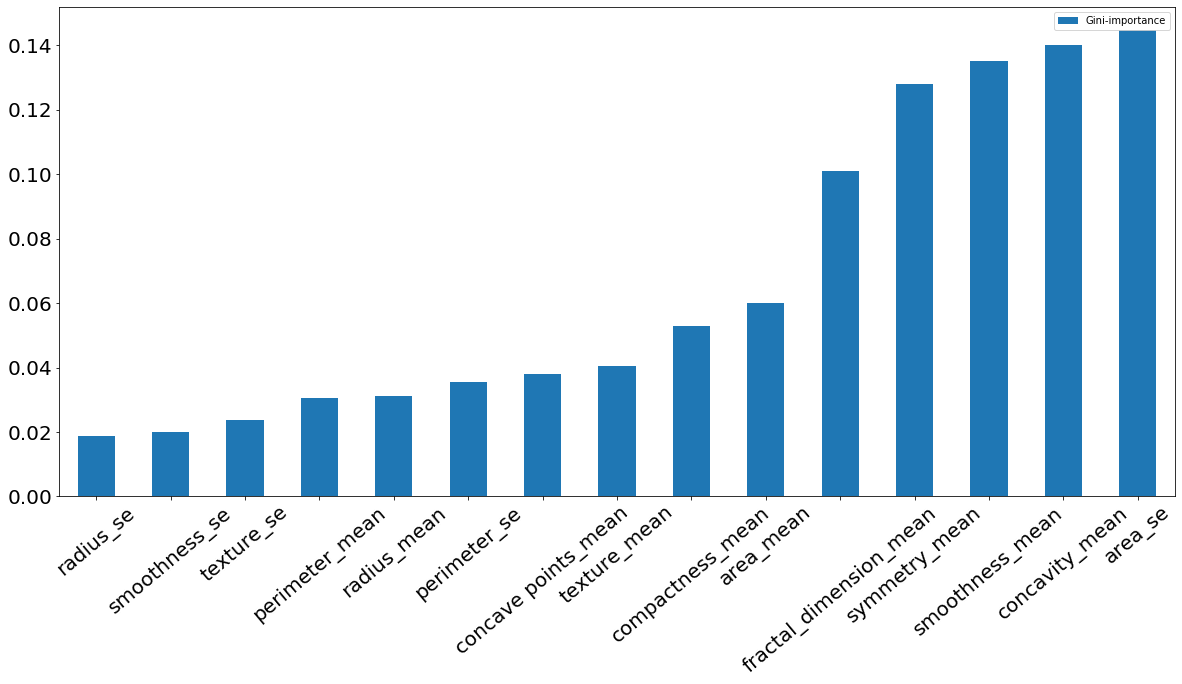

In [485]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, best_est.named_steps['estimator'].feature_importances_):
    feats[feature] = importance #add the name/value pair
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar',fontsize=20, rot=40, figsize=(20, 9))

In [486]:
feature_list = list(X.columns)
importances = list(best_est.named_steps['estimator'].feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)


[print('Variable: {:15} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: smoothness_mean Importance: 0.14
Variable: concavity_mean  Importance: 0.14
Variable: area_se         Importance: 0.14
Variable: symmetry_mean   Importance: 0.13
Variable: fractal_dimension_mean Importance: 0.1
Variable: area_mean       Importance: 0.06
Variable: compactness_mean Importance: 0.05
Variable: texture_mean    Importance: 0.04
Variable: concave points_mean Importance: 0.04
Variable: perimeter_se    Importance: 0.04
Variable: radius_mean     Importance: 0.03
Variable: perimeter_mean  Importance: 0.03
Variable: radius_se       Importance: 0.02
Variable: texture_se      Importance: 0.02
Variable: smoothness_se   Importance: 0.02


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [487]:
print(best_est.named_steps['feat_select'].support_)
print(best_est.named_steps['feat_select'].ranking_)
print(np.where(best_est.named_steps['feat_select'].support_ == False)[0])

[False  True  True  True False False  True  True False False False False
 False  True False False False False False False  True  True  True  True
  True  True  True  True  True False]
[ 2  1  1  1  6 14  1  1  9 13  4  8  3  1 16 15  5 12 10 11  1  1  1  1
  1  1  1  1  1  7]
[ 0  4  5  8  9 10 11 12 14 15 16 17 18 19 29]


In [488]:
X.drop(X.columns[np.where(best_est.named_steps['feat_select'].support_ == False)[0]], axis=1, inplace=True)

In [489]:
X.shape

(569, 15)

In [490]:
X_new = X

### RFECV check

In [583]:
# Running RFECV
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
rfecv.fit(X_train, Y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [592]:
#optimal number of features
rfecv.n_features_

17

In [593]:
rfecv.grid_scores_

array([0.87472527, 0.91208791, 0.92087912, 0.92967033, 0.93406593,
       0.93846154, 0.93626374, 0.94505495, 0.94725275, 0.95384615,
       0.95384615, 0.94945055, 0.95164835, 0.95824176, 0.95164835,
       0.94505495, 0.96263736, 0.95164835, 0.94945055, 0.95164835,
       0.95384615, 0.95604396, 0.95824176, 0.94725275, 0.96043956,
       0.94945055, 0.96043956, 0.95164835, 0.95604396, 0.95604396])

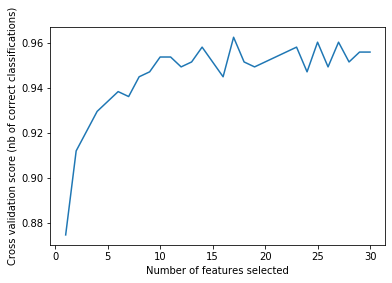

In [594]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [595]:
#10 features
rfecv.support_

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [602]:
print(np.where(rfecv.support_ == False)[0])

#X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 4  5  8  9 11 12 14 15 16 17 18 19 29]


In [603]:
rfecv.estimator_.feature_importances_

array([0.01064481, 0.01878791, 0.02751512, 0.03834597, 0.0374928 ,
       0.12955346, 0.00738685, 0.06091014, 0.11892193, 0.02499665,
       0.13605418, 0.11919884, 0.01661892, 0.02081711, 0.025352  ,
       0.19577545, 0.01162784])

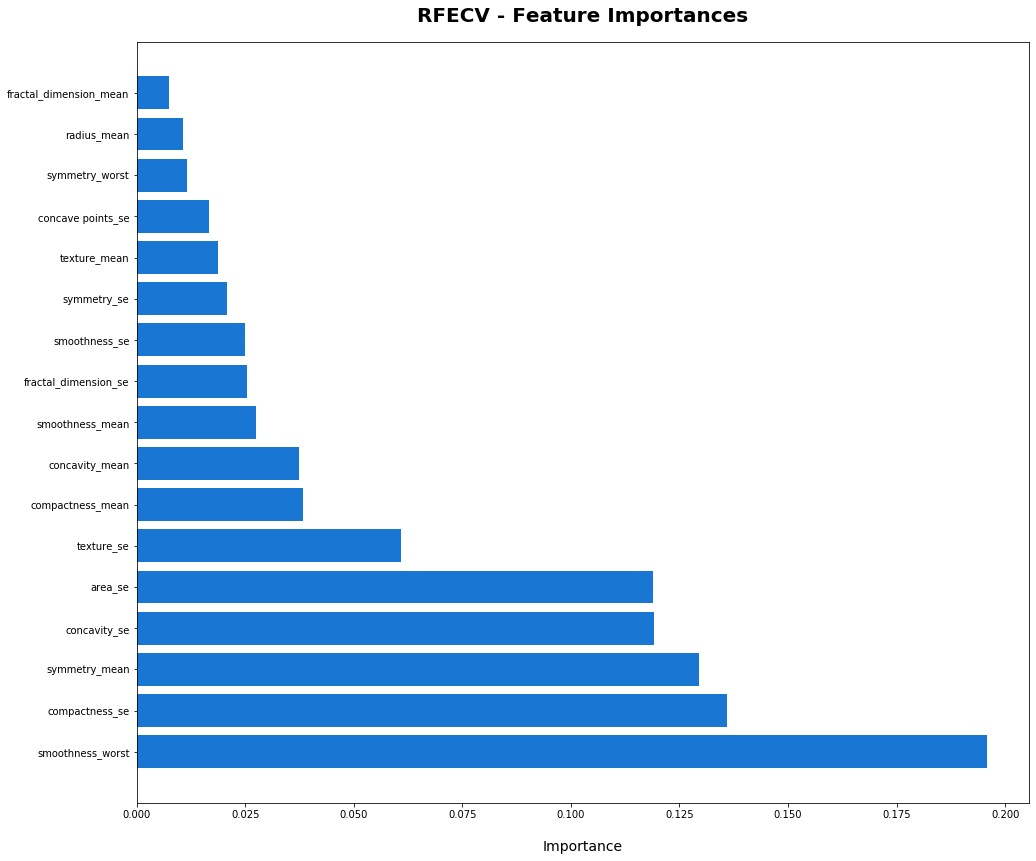

In [610]:
dset = pd.DataFrame()
dset['attr'] = X.columns[0:17]
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [346]:
rfe = RFE(clf, 3, step=1)
rfe = rfe.fit(X_train, Y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True False False False  True False False False  True False False False
 False False False False False False]
[ 1  4 12  2  1 16 11 15  1 13 14  5  8 10  7  3  6  9]


### Predictions

In [547]:
#prediction test
predict = best_est.predict(X_test)

In [548]:
best_est.score(X_test,Y_test)

0.9824561403508771

In [549]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [494]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predict)
cm

array([[66,  1],
       [ 1, 46]], dtype=int64)

In [611]:
accuracy = accuracy_score(Y_test, predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.25%


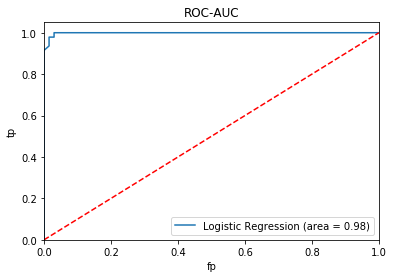

In [495]:
logit_roc_auc = roc_auc_score(Y_test, predict)
fpr, tpr, thresholds = roc_curve(Y_test, best_est.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('fp')
plt.ylabel('tp')
plt.title('ROC-AUC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Grid Search

In [512]:
X1_train, X1_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 0)

In [554]:
param_grid_new = {"estimator__n_estimators": [50,100,200,300],
              "estimator__max_depth": [3, 4,5,10,20],
              "estimator__max_features": ['sqrt'],
              "estimator__min_samples_split": [2, 3, 10],
              "estimator__min_samples_leaf": [1, 3, 10],
              "estimator__bootstrap": [True],
              "estimator__criterion": ["entropy"]}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

In [555]:
 # grid search

grid_search = GridSearchCV(pipeline_with_fs, param_grid=param_grid_new, cv=cv, scoring = 'roc_auc', n_jobs= -1)


In [556]:
grid_search.fit(X1_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('feat_select',
                                        RFE(estimator=RandomForestClassifier(bootstrap=True,
                                                                             class_weight=None,
                                                                             criterion='gini',
                                                                             max_depth=None,
                                                                             max_features='auto',
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None

In [558]:
grid_search.best_score_

0.9862591431556949

In [559]:
grid_search.best_params_

{'estimator__bootstrap': True,
 'estimator__criterion': 'entropy',
 'estimator__max_depth': 10,
 'estimator__max_features': 'sqrt',
 'estimator__min_samples_leaf': 3,
 'estimator__min_samples_split': 3,
 'estimator__n_estimators': 100}

In [560]:
best_best_est=grid_search.best_estimator_.fit(X1_train, y_train)

In [561]:
#best score
best_best_est.named_steps['estimator'].feature_importances_


array([0.04578114, 0.06498819, 0.13456803, 0.15273024, 0.20277767,
       0.1458558 , 0.25329892])

In [562]:
print(best_best_est.named_steps['feat_select'].support_)
print(best_best_est.named_steps['feat_select'].ranking_)
print(np.where(best_best_est.named_steps['feat_select'].support_ == False)[0])

[False False  True  True  True False  True False  True  True False False
 False  True False]
[5 4 1 1 1 3 1 7 1 1 9 6 2 1 8]
[ 0  1  5  7 10 11 12 14]


In [563]:
best_best_est.named_steps['estimator'].n_features_


7

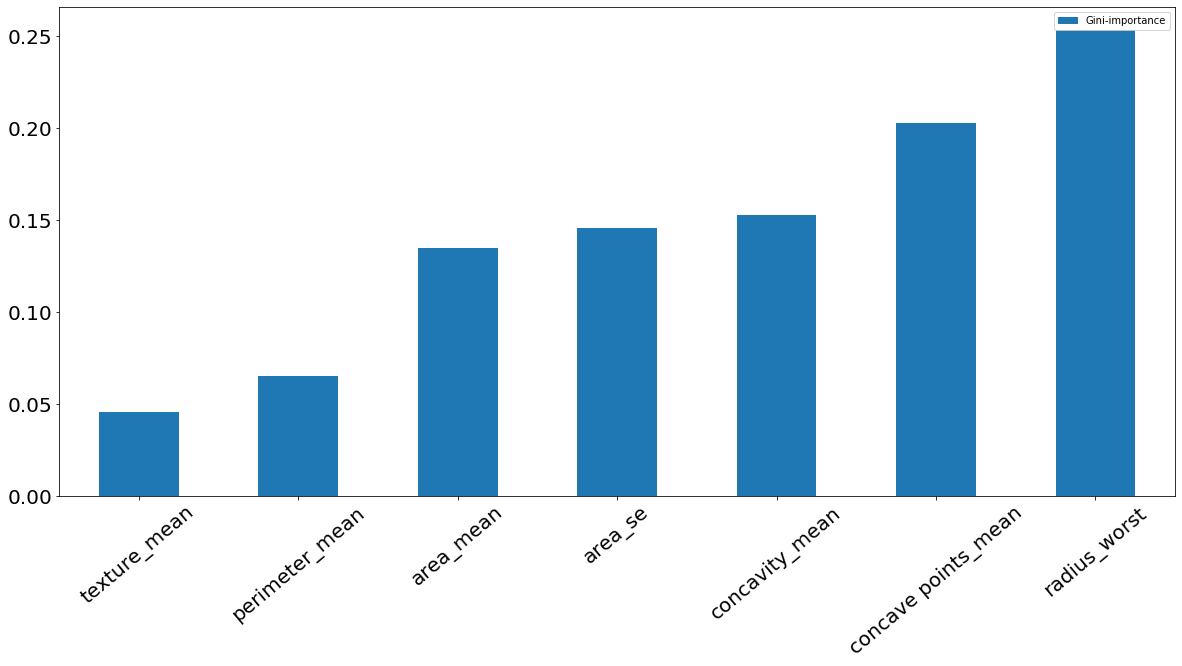

In [564]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, best_best_est.named_steps['estimator'].feature_importances_):
    feats[feature] = importance #add the name/value pair
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar',fontsize=20, rot=40, figsize=(20, 9))

### Predictions

In [565]:
#prediction test
predict2 = best_best_est.predict(X1_test)

In [566]:
print(classification_report(y_test, predict2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [569]:
accuracy = accuracy_score(y_test, predict2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 95.61%


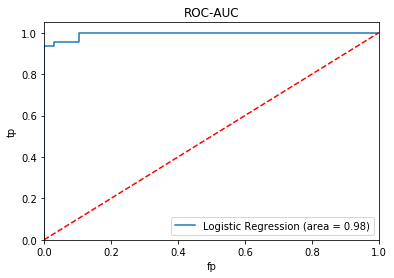

In [568]:
logit_roc_auc = roc_auc_score(Y_test, predict)
fpr, tpr, thresholds = roc_curve(y_test, best_best_est.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('fp')
plt.ylabel('tp')
plt.title('ROC-AUC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()